# Visualizing a electric field from a multipole

https://scipython.com/blog/visualizing-a-vector-field-with-matplotlib/

The electric field at $\mathbf{r}$ by a charge $q$ at $\mathbf{r_0}$

$$
\mathbf{E(\mathbf{r})} = \frac{q}{|\mathbf{r}-\mathbf{r_0}|^3} (\mathbf{r}-\mathbf{r_0}) 
$$

For a 2D plane, $\mathbf{r} = (x, y)$ and $\mathbf{r_0} = (x_0, y_0)$.

$$
E_x(x, y) = \frac{q}{|\mathbf{r}-\mathbf{r_0}|^3}(x - x_0)
$$

$$
E_y(x, y) = \frac{q}{|\mathbf{r}-\mathbf{r_0}|^3}(y - y_0)
$$

$$
|\mathbf{r}-\mathbf{r_0}| = \sqrt{(x - x_0)^2 + (y - y_0)^2}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

In [ ]:
def E(q, r0, x, y):
    """Return the electric field vector E(x,y)=(Ex, Ey) due to charge q at r0."""
    den = np.hypot(x - r0[0], y - r0[1])**3
    Ex = q * (x - r0[0]) / den
    Ey = q * (y - r0[1]) / den
    return Ex, Ey

Equally spaced $N$ points on a unit circle ($i = 0, 1, \cdots, N-1)$

$$
(\cos\theta, \sin\theta) = \left( \cos\frac{2\pi i}{N}, \sin\frac{2\pi i}{N} \right)
$$

In [ ]:
def get_E(n, nx=64, ny=64):
    # n = 1 : dipole
    # n = 2 : quadrupole
    # n = 3 : octupole
    # ...

    # Grid of x, y points
    x = np.linspace(-2, 2, nx)
    y = np.linspace(-2, 2, ny)
    X, Y = np.meshgrid(x, y)

    # Create a multipole with nq charges of alternating sign, equally spaced on the unit circle
    nq = 2**n

    charges = []
    for i in range(nq):
        q = i%2 * 2 - 1
        charges.append((q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))

    # Electric field vector, E=(Ex, Ey), as separate components
    Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
    for charge in charges:
        ex, ey = E(*charge, x=X, y=Y)
        Ex += ex
        Ey += ey

    return charges, x, y, Ex, Ey

In [ ]:
charges, x, y, Ex, Ey = get_E(1)

In [ ]:
charges

[(-1, (np.float64(1.0), np.float64(0.0))),
 (1, (np.float64(-1.0), np.float64(1.2246467991473532e-16)))]

In [ ]:
x

array([-2.        , -1.93650794, -1.87301587, -1.80952381, -1.74603175,
       -1.68253968, -1.61904762, -1.55555556, -1.49206349, -1.42857143,
       -1.36507937, -1.3015873 , -1.23809524, -1.17460317, -1.11111111,
       -1.04761905, -0.98412698, -0.92063492, -0.85714286, -0.79365079,
       -0.73015873, -0.66666667, -0.6031746 , -0.53968254, -0.47619048,
       -0.41269841, -0.34920635, -0.28571429, -0.22222222, -0.15873016,
       -0.0952381 , -0.03174603,  0.03174603,  0.0952381 ,  0.15873016,
        0.22222222,  0.28571429,  0.34920635,  0.41269841,  0.47619048,
        0.53968254,  0.6031746 ,  0.66666667,  0.73015873,  0.79365079,
        0.85714286,  0.92063492,  0.98412698,  1.04761905,  1.11111111,
        1.17460317,  1.23809524,  1.3015873 ,  1.36507937,  1.42857143,
        1.49206349,  1.55555556,  1.61904762,  1.68253968,  1.74603175,
        1.80952381,  1.87301587,  1.93650794,  2.        ])

In [ ]:
y

array([-2.        , -1.93650794, -1.87301587, -1.80952381, -1.74603175,
       -1.68253968, -1.61904762, -1.55555556, -1.49206349, -1.42857143,
       -1.36507937, -1.3015873 , -1.23809524, -1.17460317, -1.11111111,
       -1.04761905, -0.98412698, -0.92063492, -0.85714286, -0.79365079,
       -0.73015873, -0.66666667, -0.6031746 , -0.53968254, -0.47619048,
       -0.41269841, -0.34920635, -0.28571429, -0.22222222, -0.15873016,
       -0.0952381 , -0.03174603,  0.03174603,  0.0952381 ,  0.15873016,
        0.22222222,  0.28571429,  0.34920635,  0.41269841,  0.47619048,
        0.53968254,  0.6031746 ,  0.66666667,  0.73015873,  0.79365079,
        0.85714286,  0.92063492,  0.98412698,  1.04761905,  1.11111111,
        1.17460317,  1.23809524,  1.3015873 ,  1.36507937,  1.42857143,
        1.49206349,  1.55555556,  1.61904762,  1.68253968,  1.74603175,
        1.80952381,  1.87301587,  1.93650794,  2.        ])

In [ ]:
Ex.shape

(64, 64)

In [ ]:
Ey.shape

(64, 64)

In [ ]:
def draw_results(charges, x, y, Ex, Ey):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Plot the streamlines with an appropriate colormap and arrow style
    color = 2 * np.log(np.hypot(Ex, Ey))
    ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
                density=2, arrowstyle='->', arrowsize=1.5)

    # Add filled circles for the charges themselves
    charge_colors = {True: '#aa0000', False: '#0000aa'}
    for q, pos in charges:
        ax.add_artist(patches.Circle(pos, 0.05, color=charge_colors[q>0], zorder=99))

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    plt.show()

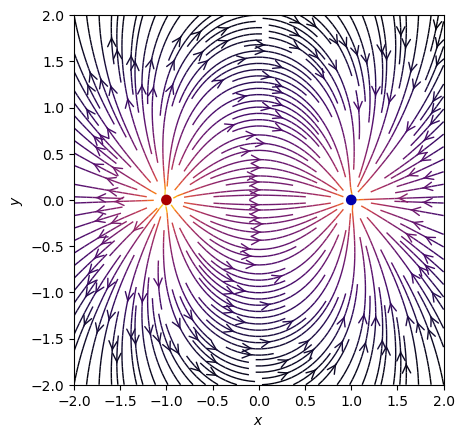

In [ ]:
# dipole
draw_results(*get_E(1))

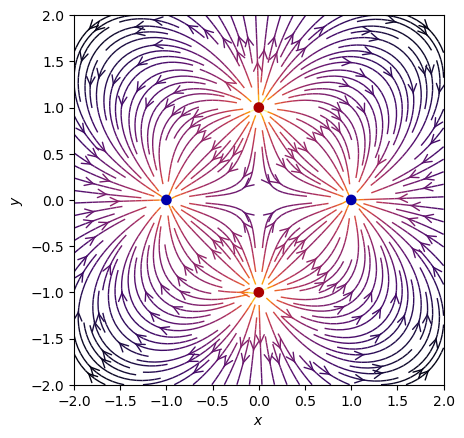

In [ ]:
# quadrupole
draw_results(*get_E(2))

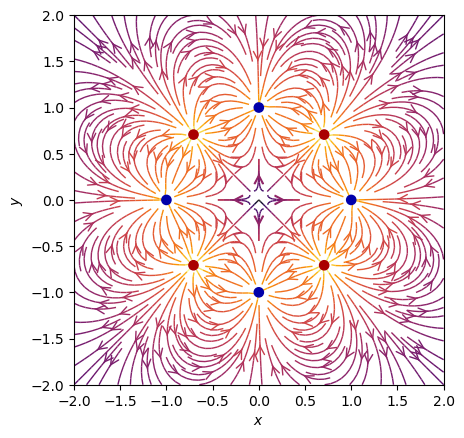

In [ ]:
# octupole
draw_results(*get_E(3))

## Solving streamline ODE

https://www.numbercrunch.de/blog/2013/05/visualizing-streamlines/

In [ ]:
from scipy.integrate import ode

In [ ]:
def draw_streamlines(n):
    # Create a multipole with nq charges of alternating sign, equally spaced on the unit circle
    nq = 2**n

    charges = []
    for i in range(nq):
        q = i%2 * 2 - 1
        charges.append((q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))


    R = 0.01

    def E(q, r0, x, y):
        den = np.hypot(x - r0[0], y - r0[1])**3
        Ex = q * (x - r0[0]) / den
        Ey = q * (y - r0[1]) / den
        return Ex, Ey

    def E_total(x, y, charges):
        Ex, Ey = 0, 0
        for C in charges:
            q, pos = C
            ex, ey = E(q, pos, x, y)
            Ex += ex
            Ey += ey
        return Ex, Ey

    def streamline(t, y, charges):
        Ex, Ey = E_total(y[0], y[1], charges)
        Emag = np.hypot(Ex, Ey)
        return [Ex/Emag, Ey/Emag]

    x0, x1 = -2, 2
    y0, y1 = -2, 2

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)

    N = 16
    for C in charges:
        q, pos = C
        dt = 0.8*R
        if q < 0:
            dt = -dt
        for alpha in np.linspace(0, 2*np.pi*(N-1)/N, N):
            r = ode(streamline)
            r.set_integrator('vode')
            r.set_f_params(charges)
            xp = [ pos[0] + R*np.cos(alpha) ]
            yp = [ pos[1] + R*np.sin(alpha) ]
            r.set_initial_value([xp[0], yp[0]], t=0.0)
            while r.successful():
                r.integrate(r.t + dt)
                xp.append(r.y[0])
                yp.append(r.y[1])
                hit_charge = False
                for C2 in charges:
                    _, pos2 = C2
                    distance = np.hypot(r.y[0] - pos2[0], r.y[1] - pos2[1])
                    if distance < R:
                        hit_charge = True
                x_inside = x0 < r.y[0]  and r.y[0] < x1
                y_inside = y0 < r.y[1]  and r.y[1] < y1
                if hit_charge or (not x_inside) or (not y_inside):
                    break
            ax.plot(xp, yp, '-k')

    # Add filled circles for the charges themselves
    charge_colors = {True: '#aa0000', False: '#0000aa'}
    for q, pos in charges:
        ax.add_artist(patches.Circle(pos, 0.05, color=charge_colors[q>0], zorder=99))

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    plt.show()

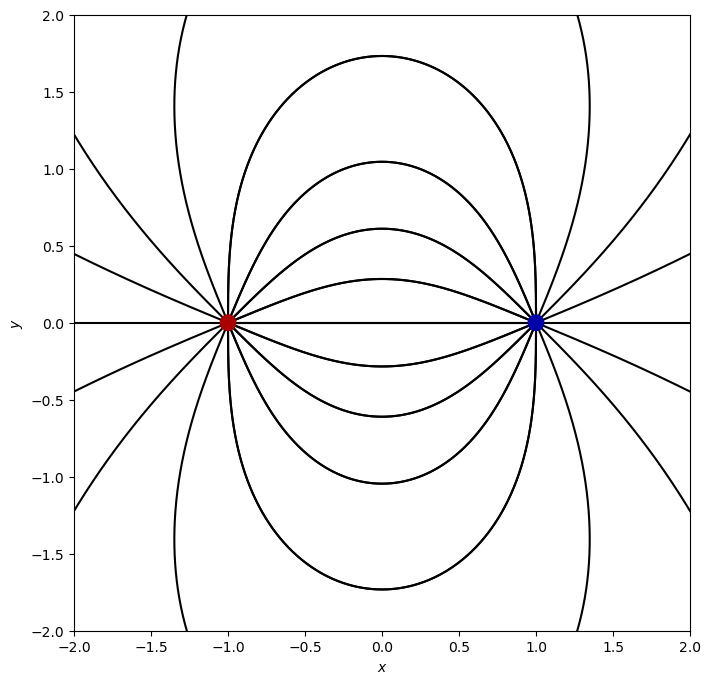

In [ ]:
# dipole
draw_streamlines(1)

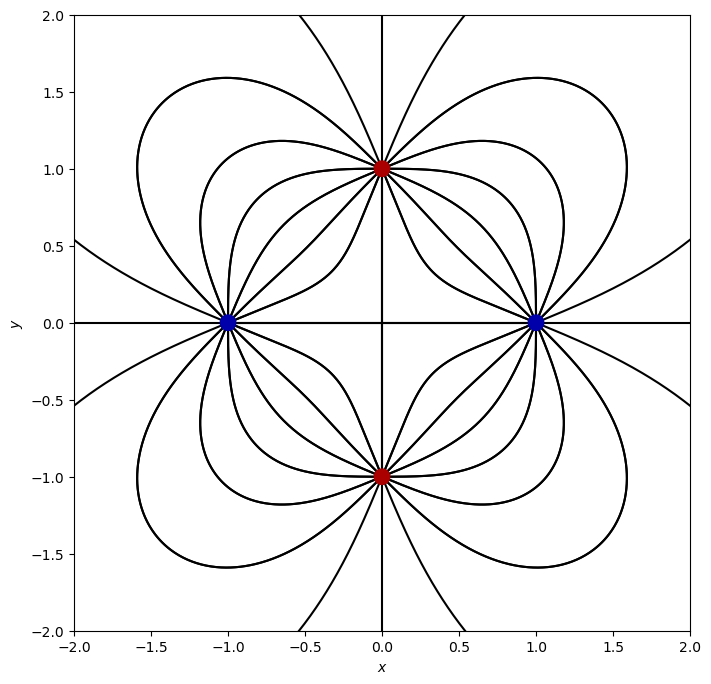

In [ ]:
# quadrupole
draw_streamlines(2)

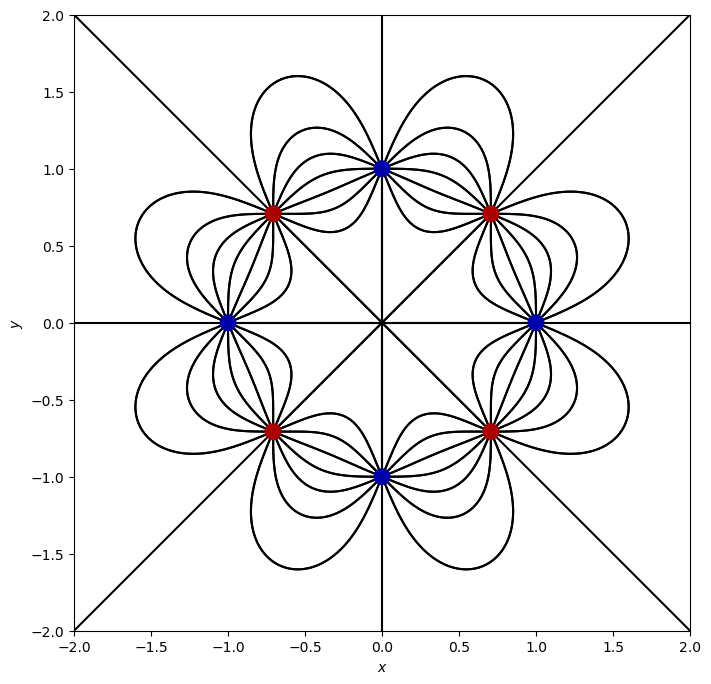

In [ ]:
# octupole
draw_streamlines(3)